In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [3]:
data=load_diabetes()

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
X= data.data
y= data.target

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,
                                                 random_state=45)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
l =LinearRegression()

In [13]:
l.fit(X_train,y_train)

LinearRegression()

In [14]:
y_Lpred = l.predict(X_test)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
r2_score(y_test,y_Lpred)

0.5188113124539246

In [18]:
np.sqrt(mean_squared_error(y_test,y_Lpred))

48.727137609532534

In [19]:
from sklearn.linear_model import Ridge

In [21]:
R=Ridge(alpha=0.0001)

In [22]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [25]:
y_Rpred = R.predict(X_test)

In [26]:
r2_score(y_test,y_Rpred)

0.5189732635884954

In [38]:
np.sqrt(mean_squared_error(y_test,y_Rpred))

48.71893700181953

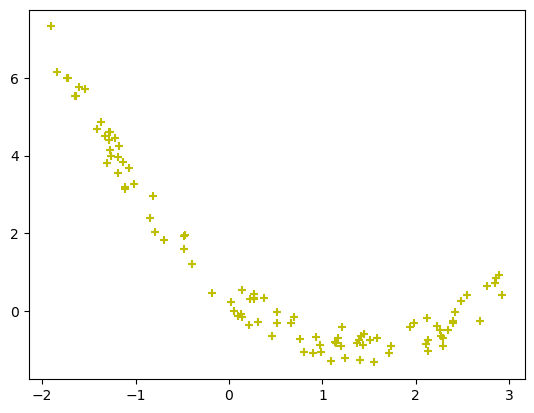

In [52]:
m= 100
x1 = 5*np.random.rand(m,1)-2
x2= 0.7*x1**2-2*x1 +np.random.rand(m,1)

plt.scatter(x1,x2,c='y',marker='+')

In [53]:
from sklearn.datasets import make_regression

In [54]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,
                     n_targets=1,noise=20,random_state=13)

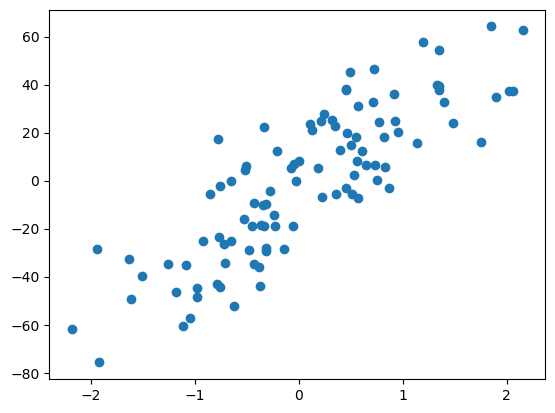

In [55]:
plt.scatter(X,y)

In [56]:
lr =LinearRegression()

In [57]:
lr.fit(X,y)


LinearRegression()

In [58]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [59]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [60]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


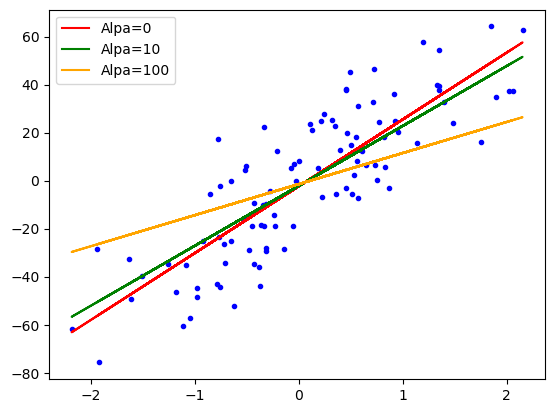

In [64]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='r',label='Alpa=0')
plt.plot(X,rr.predict(X),color='g',label='Alpa=10')
plt.plot(X,rr1.predict(X),color='orange',label='Alpa=100')
plt.legend()

In [70]:
class myridge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m=None
        self.b=None
    
    def fit(self, X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i]-y_train.mean())*(X_train[i]-X_train.mean()))
            den = den + ((X_train[i]-X_train.mean())**2) 
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - self.m*X_train.mean()
        print(self.m,self.b)
        
        
    def predict(X_test):
        pass
    

In [73]:
reg = myridge(alpha=100)

In [74]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


## Practice

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
X,y =load_diabetes(return_X_y=True)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=4)

In [6]:
from sklearn.linear_model import Ridge

In [7]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [8]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [9]:
ypred=reg.predict(X_test)

In [10]:
r2_score(y_test,ypred)

0.46931288533098037

In [14]:
print('w=',reg.coef_,'b=',reg.intercept_)

w= [  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681] b= 150.89053425602808


In [53]:
class myridge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef=None
        self.inter=None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I= np.identity(X_train.shape[1])
        result = (np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha*I)).dot(X_train.T).dot(y_train)
        
        self.inter = result[0]
        self.coef = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.inter

In [54]:
reg2 =myridge()

In [55]:
reg2.fit(X_train,y_train)

In [56]:
reg2.predict(y_test)

ValueError: shapes (89,) and (10,) not aligned: 89 (dim 0) != 10 (dim 0)

In [58]:
X_train.shape

(353, 10)